In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [24]:
#Generate isotropic Gaussian blobs for clustering.
#it basically create cluster we will not use y 
#or _in place of y as unsupervised learning
#X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=6)

In [31]:
X[:10]


array([[ -7.32786741,   4.23641465],
       [  1.12565931,   6.32088416],
       [ -0.49239887,  -5.28550826],
       [ -7.12432134,   6.16236021],
       [  2.38696269,   4.11331935],
       [  6.55519802, -10.28277104],
       [ -4.60484127,   4.27470475],
       [ -1.27010839,  -6.55718306],
       [  5.77989048,  -9.7922405 ],
       [ -7.72699176,  -9.47166311]])

In [32]:
X.shape

(500, 2)

In [27]:
#y[:10]

In [28]:
#y.shape

In [29]:
X ,_=make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)
#centers is for how many groups we want

In [30]:
X[:10,0]

array([-7.32786741,  1.12565931, -0.49239887, -7.12432134,  2.38696269,
        6.55519802, -4.60484127, -1.27010839,  5.77989048, -7.72699176])

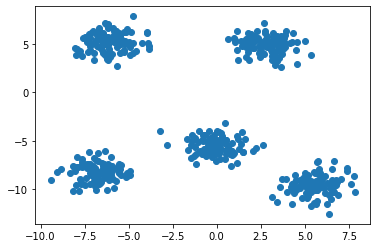

In [33]:
#X[:,feature1] ,X[:,feature2]
plt.scatter(X[:,0],X[:,1])
#five Cluster 
#we have to find labels for them for eg colour mapping 

In [34]:
#first we make from scratch then we do by sklearn

In [35]:
k=5

In [36]:
color=["red","maroon","blue","yellow","orange"]

In [37]:
#intialize clusters- centeroid by finding mean of data(centers) randomly
for i in range(k):
    center =np.random.randint(-8,10,size=(X.shape[1]))

In [38]:
#np.random.randint(-8,10,size=(X.shape[1],))
#or this can be written as
np.random.randint(-8,10,size=(2,))

array([-3,  0])

In [39]:
(X.shape[1],)

(2,)

In [40]:
clusters = {}

# step 1


In [45]:
# Initialize clusters

for i in range(k):
    center = np.random.randint(-8, 10, size= (X.shape[1],), )
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    
    clusters[i] = cluster

In [46]:
clusters
#its a dictonary of all the clusters containing centers and color 
#now points is for the list of all points nearest to cluster centers

{0: {'center': array([ 6, -5]), 'points': [], 'color': 'red'},
 1: {'center': array([4, 7]), 'points': [], 'color': 'maroon'},
 2: {'center': array([-8,  7]), 'points': [], 'color': 'blue'},
 3: {'center': array([ 1, -3]), 'points': [], 'color': 'yellow'},
 4: {'center': array([-1, -3]), 'points': [], 'color': 'orange'}}

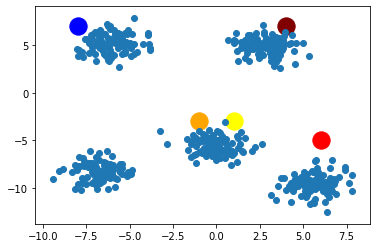

In [47]:

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
    
plt.scatter(X[:, 0], X[:, 1])
    
plt.show()

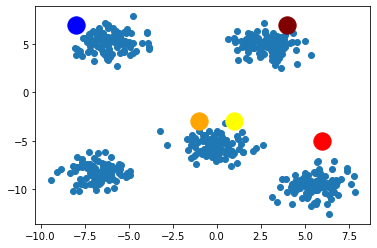

In [48]:
plt.scatter(X[:, 0], X[:, 1])

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
plt.show()

# Step2- Assign All points to nearest Cluster 

In [49]:
#it will iterate over all the points
#find the distance from all 5  =k and include which is nearest or less distance 

In [50]:
#Euclidean Distance b/w cluster pts and cluster center
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

In [51]:
def assignPointsToCluster(clusters, X):
    
    for ix in range(X.shape[0]):#iterate for all the examples
        distance_of_i = [] #we can make alist of five dist from cluster center
        
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #distance of the point with all the five (k) cluster crnters
            distance_of_i.append(d)
            
        cluster_to_choose = np.argmin(distance_of_i)
        #here we want min dist cluster center
        clusters[cluster_to_choose]['points'].append(X[ix])
        #here we are appending the cluster pts in pts list that are mini dist with center 

In [52]:
clusters[0]["center"] 

array([ 6, -5])

In [53]:
assignPointsToCluster(clusters, X)

In [54]:
clusters[3]
#cluster center associated with the nearest point !! 

{'center': array([ 1, -3]),
 'points': [array([ 0.48548549, -3.11994247]),
  array([ 0.49933051, -6.40021093]),
  array([ 0.03086807, -5.52710828]),
  array([ 0.14043494, -6.26189674]),
  array([ 0.11280954, -6.28810265]),
  array([ 1.49799137, -6.15350546]),
  array([ 0.12206767, -5.80826726]),
  array([ 1.21828954, -4.77134132]),
  array([ 1.24518935, -5.83289913]),
  array([ 0.93795066, -6.37859213]),
  array([ 0.24592267, -5.89334863]),
  array([ 0.61689858, -6.1775689 ]),
  array([ 0.31649182, -4.56170259]),
  array([ 1.36795963, -5.37940031]),
  array([ 2.21200675, -5.75055421]),
  array([ 0.5491887 , -5.96399264]),
  array([ 0.42220747, -5.20999783]),
  array([ 0.61866966, -5.52849563]),
  array([ 0.02647603, -4.03841208]),
  array([ 0.16394086, -4.960832  ]),
  array([ 0.02645498, -4.95828262]),
  array([ 0.22775098, -4.19114434]),
  array([ 1.61490138, -4.78063789]),
  array([ 0.50554163, -4.95322239]),
  array([ 2.64182533, -5.43962159]),
  array([ 0.13889385, -5.55406427]),


In [55]:
# #plotting clusters
# for kx in range(k):
#         cluster_ke_points = clusters[kx]['points']
#         cluster_ka_color = clusters[kx]['color']
#         cluster_ka_center = clusters[kx]['center']
        
#         cluster_ke_points = np.array(cluster_ke_points)
#         #bcz cluster pts are array of list but we want array so 
#         print(cluster_ke_points.shape)
#         if len(cluster_ke_points)>0:
#             #if no point is associated with cluster center
#             plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
#         plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

In [56]:
def plotclusters(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        cluster_ka_color = clusters[kx]['color']
        cluster_ka_center = clusters[kx]['center']
        
        cluster_ke_points = np.array(cluster_ke_points)
        print(cluster_ke_points.shape)
        if len(cluster_ke_points)>0:
            plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
        plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

# Step - 3 Update centers to mean of all points

In [57]:
def updateCluster(clusters):
    
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        
        cluster_ke_points = np.array(cluster_ke_points)
        
        if len(cluster_ke_points)>0:
            new_center = np.mean(cluster_ke_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge 

In [58]:

cluster_ke_points

NameError: name 'cluster_ke_points' is not defined

(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


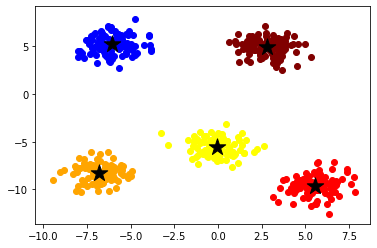

In [62]:
assignPointsToCluster(clusters, X)

plotclusters(clusters)

updateCluster(clusters)
#predictiion 

# Actual Outputs

In [63]:
#Actual 
#for seeing actual output u can check with this 
X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)

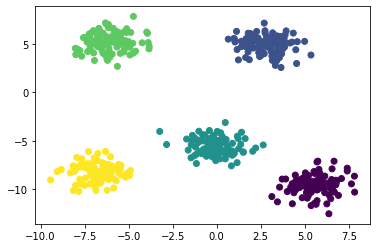

In [64]:
#y is label here 
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

# from Sklearn - KMeans++

In [65]:
from sklearn.cluster import KMeans

In [66]:
km = KMeans(n_clusters=5)
# init='k-means++' defaultly kmeans is set above we have done randomly
"""init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default=10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia."""

"init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'\n    Method for initialization, defaults to 'k-means++':\n\n    'k-means++' : selects initial cluster centers for k-mean\n    clustering in a smart way to speed up convergence. See section\n    Notes in k_init for more details.\n\n    'random': choose k observations (rows) at random from data for\n    the initial centroids.\n\n    If an ndarray is passed, it should be of shape (n_clusters, n_features)\n    and gives the initial centers.\n\nn_init : int, default=10\n    Number of time the k-means algorithm will be run with different\n    centroid seeds. The final results will be the best output of\n    n_init consecutive runs in terms of inertia."

In [67]:
y #this we will not use in fit as unsupervised learning

array([3, 1, 2, 3, 1, 0, 3, 2, 0, 4, 0, 0, 1, 1, 4, 1, 4, 0, 0, 3, 0, 3,
       2, 3, 4, 3, 4, 1, 3, 3, 1, 1, 4, 1, 0, 2, 0, 2, 1, 2, 3, 3, 1, 2,
       1, 0, 3, 0, 1, 3, 4, 3, 0, 4, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 3, 4,
       3, 2, 3, 4, 4, 2, 2, 2, 3, 3, 4, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 4,
       0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 1, 4, 3, 4, 4, 4, 2, 1, 3, 2, 0, 1,
       4, 0, 1, 1, 3, 3, 3, 0, 3, 0, 1, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 3,
       4, 1, 2, 2, 2, 1, 3, 4, 1, 2, 3, 3, 3, 0, 1, 2, 0, 0, 2, 4, 0, 0,
       4, 3, 4, 1, 4, 3, 1, 1, 1, 4, 1, 1, 0, 2, 3, 3, 3, 3, 3, 2, 2, 4,
       3, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 4, 4, 2, 4, 3,
       0, 1, 3, 4, 4, 1, 1, 1, 2, 3, 0, 2, 2, 1, 1, 0, 3, 2, 2, 4, 2, 4,
       1, 0, 1, 2, 3, 0, 4, 4, 4, 4, 2, 4, 4, 0, 4, 4, 2, 2, 3, 3, 4, 1,
       2, 2, 2, 1, 1, 3, 4, 4, 4, 3, 3, 1, 4, 4, 4, 0, 3, 2, 0, 0, 2, 1,
       0, 3, 2, 3, 0, 2, 4, 1, 4, 1, 0, 4, 4, 0, 3, 0, 0, 0, 2, 2, 0, 2,
       1, 3, 0, 4, 1, 2, 0, 0, 2, 4, 2, 4, 0, 4, 0,

In [68]:
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
print(km.labels_)
#so it associate every point with each clusters 

[2 1 0 2 1 3 2 0 3 4 3 3 1 1 4 1 4 3 3 2 3 2 0 2 4 2 4 1 2 2 1 1 4 1 3 0 3
 0 1 0 2 2 1 0 1 3 2 3 1 2 4 2 3 4 0 0 1 3 1 1 1 0 0 0 2 4 2 0 2 4 4 0 0 0
 2 2 4 0 0 1 0 1 2 3 2 0 1 4 3 1 1 0 2 1 3 0 1 2 1 4 2 4 4 4 0 1 2 0 3 1 4
 3 1 1 2 2 2 3 2 3 1 3 0 2 3 2 3 2 0 0 3 2 4 1 0 0 0 1 2 4 1 0 2 2 2 3 1 0
 3 3 0 4 3 3 4 2 4 1 4 2 1 1 1 4 1 1 3 0 2 2 2 2 2 0 0 4 2 0 0 1 1 3 1 1 1
 1 3 0 1 1 1 2 1 4 4 0 4 2 3 1 2 4 4 1 1 1 0 2 3 0 0 1 1 3 2 0 0 4 0 4 1 3
 1 0 2 3 4 4 4 4 0 4 4 3 4 4 0 0 2 2 4 1 0 0 0 1 1 2 4 4 4 2 2 1 4 4 4 3 2
 0 3 3 0 1 3 2 0 2 3 0 4 1 4 1 3 4 4 3 2 3 3 3 0 0 3 0 1 2 3 4 1 0 3 3 0 4
 0 4 3 4 3 0 4 0 1 1 3 4 3 1 0 1 0 1 0 0 4 3 0 0 1 4 0 3 4 0 0 4 3 0 4 0 2
 2 2 3 3 2 3 4 1 3 1 3 4 3 3 2 2 1 3 3 3 3 4 0 3 1 3 1 4 2 4 4 3 4 2 2 4 4
 2 4 3 2 4 0 4 3 3 3 3 3 0 2 1 1 1 2 2 3 3 4 4 0 2 0 0 1 3 1 4 3 2 2 2 3 4
 1 1 4 2 3 1 0 0 3 4 4 2 4 1 2 4 0 4 4 3 4 3 4 1 0 2 2 2 4 1 2 2 3 0 1 3 2
 1 2 3 3 2 0 2 3 2 0 4 2 3 0 2 2 1 2 2 1 1 1 4 0 0 1 2 0 1 0 0 0 4 3 3 3 0
 4 4 1 3 1 4 4 3 4 2 3 0 

In [70]:
km.cluster_centers_
#these are cluster centers !!

array([[-0.06909909, -5.56399319],
       [ 2.78561142,  4.93182424],
       [-6.06533341,  5.2400571 ],
       [ 5.56873506, -9.60861515],
       [-6.78567723, -8.26282547]])

In [71]:
km.inertia_

872.8554968701876

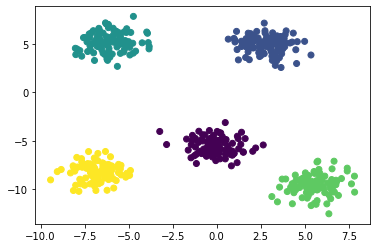

In [72]:
plt.scatter(X[:,0], X[:, 1], c= km.labels_)
